In [1]:
import astropy as astropy
import astropy.units as u
import astroquery
import math
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
from astropy.io import fits
from astropy.table import Table
from astroquery.vizier import Vizier
import numpy as np
import matplotlib.pyplot as plt
import aplpy
import pandas as pd

In [41]:
#data
file = astropy.io.ascii.read('Research Sources - Sheet1.csv')
OIII5008 = np.array(file['col21'][1:12]).astype(np.float64)
OIII5008_err = np.array(file['col22'][1:12]).astype(np.float64)
HBeta = np.array(file['col23'][1:12]).astype(np.float64)
HBeta_err = np.array(file['col24'][1:12]).astype(np.float64)
NII6549 = np.array(file['col25'][1:12]).astype(np.float64)
NII6549_err = np.array(file['col26'][1:12]).astype(np.float64)
HAlpha = np.array(file['col27'][1:12]).astype(np.float64)
HAlpha_err = np.array(file['col28'][1:12]).astype(np.float64)
SIIsummed = np.array(file['col29'][1:12]).astype(np.float64)
SIIsummed_err = np.array(file['col30'][1:12]).astype(np.float64)
OI6302 = np.array(file['col31'][1:12]).astype(np.float64)
OI6302_err = np.array(file['col32'][1:12]).astype(np.float64)
LOTSSFlux = np.array(file['col4'][1:12]).astype(np.float64)
redshift = np.array(file['col14'][1:12]).astype(np.float64)
Wa = np.array(file['col33'][1:12]).astype(np.float64)
cont_err = np.array(file['col35'][1:12]).astype(np.float64)
error = np.array(file['col5'][1:12]).astype(np.float64)
FIRSTFlux = [0.45,0.45,1.11,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45]
sSFR = np.array(file['col18'][1:12]).astype(np.float64)
mass = np.array(file['col16'][1:12]).astype(np.float64)


In [42]:
NxPRS = []
NxPRS_err = []
yPRS = []
yPRS_err = []
for source in range(len(HBeta)):
    if HAlpha[source] != 0:
        NxPRS.append(np.log(NII6549[source]/HAlpha[source]))
        NxPRS_err.append((NII6549[source]/HAlpha[source])*np.sqrt((NII6549_err[source]/NII6549[source])**2+(HAlpha_err[source]/HAlpha[source])**2))
        yPRS.append(np.log(OIII5008[source]/HBeta[source]))
        yPRS_err.append((OIII5008[source]/HBeta[source])*np.sqrt((OIII5008_err[source]/OIII5008[source])**2+(HBeta_err[source]/HBeta[source])**2))

print(NxPRS)
print(yPRS)
print(NxPRS_err)
print(yPRS_err)

[-2.145610732568798, -2.7389342328023996, -1.9232939241067, -2.400778743782963, -1.9807005331446397, -2.0142620263320676, -1.5266243560746728, -2.7065089172617265, -2.4668875104137076, -2.451061003602298]
[-0.576970511104938, 0.10249659322302809, -1.6340224972315627, 0.13975424303813275, -1.1014370595636012, 0.7416639906990182, -0.542553278025544, 0.21824944097791055, -0.45038969538177015, -0.2988934879637854]
[0.0021058088817407163, 0.0008392971362149232, 0.0025564280215998538, 0.0014695022604977214, 0.004621709519038589, 0.0016029566479344468, 0.00710375688898594, 0.0029311131149097926, 0.005761584073567199, 0.003625000165340848]
[0.024286867513922086, 0.017383933022648245, 0.023686105870041153, 0.026035330904284323, 0.05980510181784214, 0.03358197591915553, 0.06878876565992988, 0.0739950019964419, 0.08858468443683688, 0.06646199817897433]


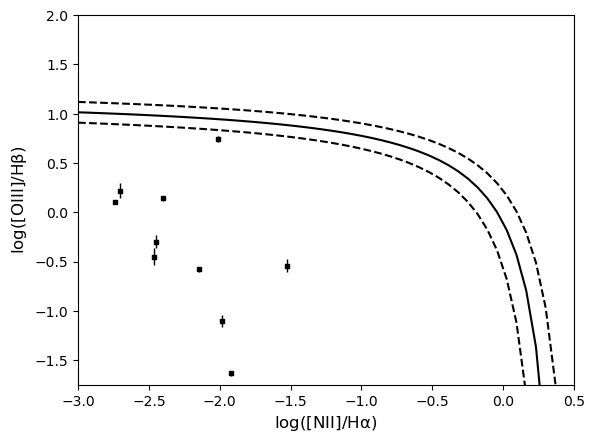

In [43]:
from astroML.datasets import fetch_sdss_corrected_spectra
from astroML.datasets.tools.sdss_fits import log_OIII_Hb_NII
plt.scatter(NxPRS,yPRS,c='black',s=5,marker='s')
plt.errorbar(NxPRS, yPRS,
            xerr=NxPRS_err,
            yerr=yPRS_err,
            capsize=0,
            ls="none",
            color="black",
            elinewidth=1)
NII = np.linspace(-3.0, 0.369)
plt.plot(NII, log_OIII_Hb_NII(NII), '-k')
plt.plot(NII, log_OIII_Hb_NII(NII, 0.1), '--k')
plt.plot(NII, log_OIII_Hb_NII(NII, -0.1), '--k')
plt.xlim(-3, 0.5)
plt.ylim(-1.75, 2)

plt.xlabel(r'$\mathrm{log([NII]/H\alpha)}$', fontsize='large')
plt.ylabel(r'$\mathrm{log([OIII]/H\beta)}$', fontsize='large')
plt.show()

In [44]:
SxPRS = []
SxPRS_err = []
for source in range(len(HBeta)):
    if HAlpha[source] != 0:
        SxPRS.append(np.log(SIIsummed[source]/HAlpha[source]))
        SxPRS_err.append((SIIsummed[source]/HAlpha[source])*np.sqrt((SIIsummed_err[source]/SIIsummed[source])**2+(HAlpha_err[source]/HAlpha[source])**2))
print(SxPRS)
print(SxPRS_err)

[-1.1160341382185475, -1.3978516907806546, -1.228183476896645, -1.2059081440312016, -1.081037329564409, -1.2725972552663665, -1.144624173268273, -0.9462048063790743, -0.8163714206357042, -0.8839475018329733]
[0.00708145266684818, 0.0032528419890371194, 0.0074380868638855265, 0.005365677709599313, 0.01586485572014782, 0.003959112086790847, 0.028725611178622393, 0.014707759654921757, 0.02624370639484186, 0.016353873742618576]


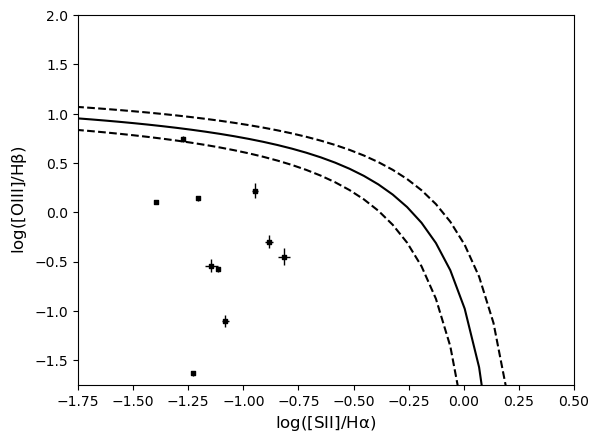

In [45]:
from astroML.datasets.tools.sdss_fits import log_OIII_Hb_SII
plt.scatter(SxPRS,yPRS,c='black',s=5,marker='s')
plt.errorbar(SxPRS, yPRS,
            xerr=SxPRS_err,
            yerr=yPRS_err,
            capsize=0,
            ls="none",
            color="black",
            elinewidth=1)
SII = np.linspace(-3.0, 0.2)
plt.plot(SII, log_OIII_Hb_SII(SII), '-k')
plt.plot(SII, log_OIII_Hb_SII(SII, 0.1), '--k')
plt.plot(SII, log_OIII_Hb_SII(SII, -0.1), '--k')
plt.xlim(-1.75, 0.5)
plt.ylim(-1.75, 2)

plt.xlabel(r'$\mathrm{log([SII]/H\alpha)}$', fontsize='large')
plt.ylabel(r'$\mathrm{log([OIII]/H\beta)}$', fontsize='large')
plt.show()

In [46]:
OxPRS = []
OxPRS_err = []
for source in range(len(HBeta)):
    if HAlpha[source] != 0:
        OxPRS.append(np.log(OI6302[source]/HAlpha[source]))
        OxPRS_err.append((OI6302[source]/HAlpha[source])*np.sqrt((OI6302_err[source]/OI6302[source])**2+(HAlpha_err[source]/HAlpha[source])**2))
print(OxPRS)
print(OxPRS_err)

[-3.6852740856676216, -4.159953898729067, -3.9918576360692093, -3.6082449153238083, -2.9651207807195905, -3.684456217151951, -2.9993742576203495, -3.0625796145651187, -3.0349919268838583, -3.750783033662467]
[0.003169716786658039, 0.0009339135887919687, 0.003556393267266771, 0.0021693435595361524, 0.009218738226486648, 0.0013519046187628614, 0.012521309202930634, 0.007876142277910517, 0.015461992791937343, 0.008826883490295277]


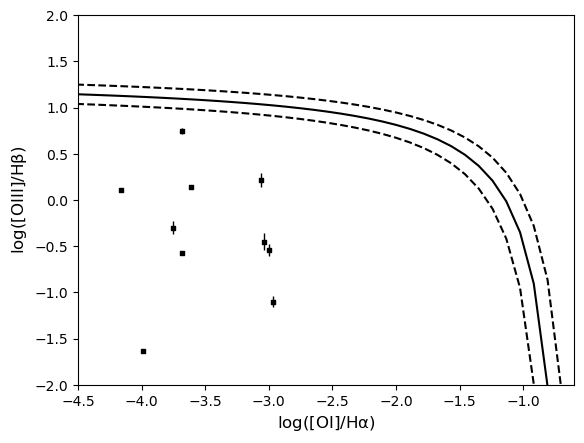

In [47]:
from astroML.datasets.tools.sdss_fits import log_OIII_Hb_OI
plt.scatter(OxPRS,yPRS,c='black',s=5,marker='s')
plt.errorbar(OxPRS, yPRS,
            xerr=OxPRS_err,
            yerr=yPRS_err,
            capsize=0,
            ls="none",
            color="black",
            elinewidth=1)
OI = np.linspace(-6, -0.7)
plt.plot(OI, log_OIII_Hb_OI(OI), '-k')
plt.plot(OI, log_OIII_Hb_OI(OI, 0.1), '--k')
plt.plot(OI, log_OIII_Hb_OI(OI, -0.1), '--k')
plt.xlim(-4.5, -0.6)
plt.ylim(-2, 2)

plt.xlabel(r'$\mathrm{log([OI]/H\alpha)}$', fontsize='large')
plt.ylabel(r'$\mathrm{log([OIII]/H\beta)}$', fontsize='large')
plt.show()

In [48]:
Walpha_err = []
Walpha = []
Nx = []
Nx_err = []
for source in range(len(Wa)):
    if HAlpha[source] != 0 and Wa[source] != 0:
        Walpha.append(Wa[source])
        Walpha_err.append(Wa[source] * np.sqrt((HAlpha_err[source]/HAlpha[source])**2+(cont_err[source]/(HAlpha[source]*Wa[source])**2)))
        Nx.append(NII6549[source]/HAlpha[source])
        Nx_err.append(np.log((NII6549[source]/HAlpha[source])*np.sqrt((NII6549_err[source]/NII6549[source])**2+(HAlpha_err[source]/HAlpha[source])**2)))
    elif HAlpha[source] != 0:
        Walpha.append(Wa[source])
        Walpha_err.append(0)
        Nx.append(NII6549[source]/HAlpha[source])
        Nx_err.append(np.log((NII6549[source]/HAlpha[source])*np.sqrt((NII6549_err[source]/NII6549[source])**2+(HAlpha_err[source]/HAlpha[source])**2)))
print(Nx)

[0.11699656160954781, 0.06463920053528417, 0.14612484438911613, 0.09064733474772922, 0.13797254910450216, 0.13341882662545165, 0.217267849724282, 0.06676949814859277, 0.08484853863154795, 0.08620207724764686]


/var/folders/97/01qdf1t973j6kp9db4ql0q100000gn/T/ipykernel_33119/2066053419.py:13: UserWarning: Attempted to set non-positive right xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(5*10**-2,0)
/var/folders/97/01qdf1t973j6kp9db4ql0q100000gn/T/ipykernel_33119/2066053419.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,max(Walpha)+15)


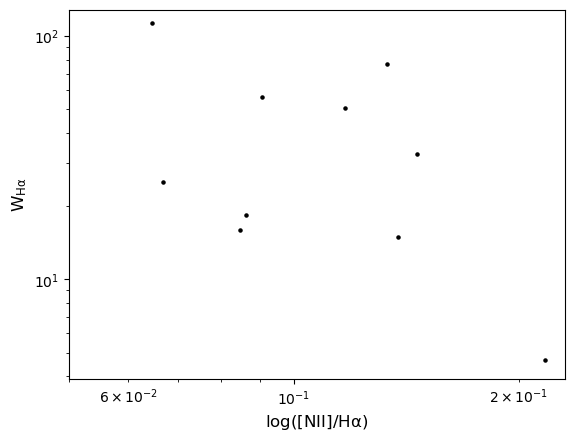

In [49]:
plt.scatter(Nx,Walpha,c='black',s=5)
plt.errorbar(Nx_err, Walpha,
            xerr=Nx_err,
            yerr=Walpha_err,
            capsize=0,
            ls="none",
            color="black",
            elinewidth=1)
plt.xlabel(r'$\mathrm{log([NII]/H\alpha)}$', fontsize='large')
plt.ylabel(r'$\mathrm{W_{H\alpha}}$', fontsize='large')
plt.yscale('log')
plt.xscale('log')
plt.xlim(5*10**-2,0)
plt.ylim(0,max(Walpha)+15)
plt.plot((-0.4,-0.4),(0,max(Walpha)+15), 'k--', scaley = True, scalex= True)
plt.plot((-3,0),(3,3), 'k--', scaley = True, scalex= True)


In [50]:
from astropy.cosmology import Planck18 as cosmo
Flux = []
SFR_err = []
Flux_err = []
for source in range(len(LOTSSFlux)):
    d = cosmo.luminosity_distance(z = redshift[source])
    dis = d.to(u.m).value
    sint = LOTSSFlux[source] * 10**(-29)
    fin = sint * 4 * np.pi * dis**2
    err = error[source] * 10**(-29)
    finerr = err * 4 * np.pi * dis**2
    Flux.append(fin)
    SFR_err.append(0)
    Flux_err.append(finerr)

In [51]:
 def galaxy_association_plot():
        fig, ax = plt.subplots(figsize=(8, 10))
        img = plt.imread("WISE_color (2).png")
        ax.imshow(img, extent=[-1, 7, -0.5, 4], aspect="auto")
        ax.scatter(W23, W12, color="black",s=5)
        ax.errorbar(
            W23,
            W12,
            xerr=W23_err,
            yerr=W12_err,
            capsize=0,
            ls="none",
            color="black",
            elinewidth=1,
        )
        
        ylabel = "[3.4] - [4.6] in mag"
        xlabel = "[4.6] - [12] in mag"
        ax.set_ylabel(ylabel, fontsize=18)
        ax.set_xlabel(xlabel, fontsize=18)
        ax.set_ybound(lower=-0.5, upper=4)
        ax.set_xbound(lower=-1, upper=7)
        ax.tick_params(axis="both", which="both", labelsize=16, length=0)
        plt.show()
        # plt.close()

In [52]:
img = plt.imread("WISE_color (2).png")

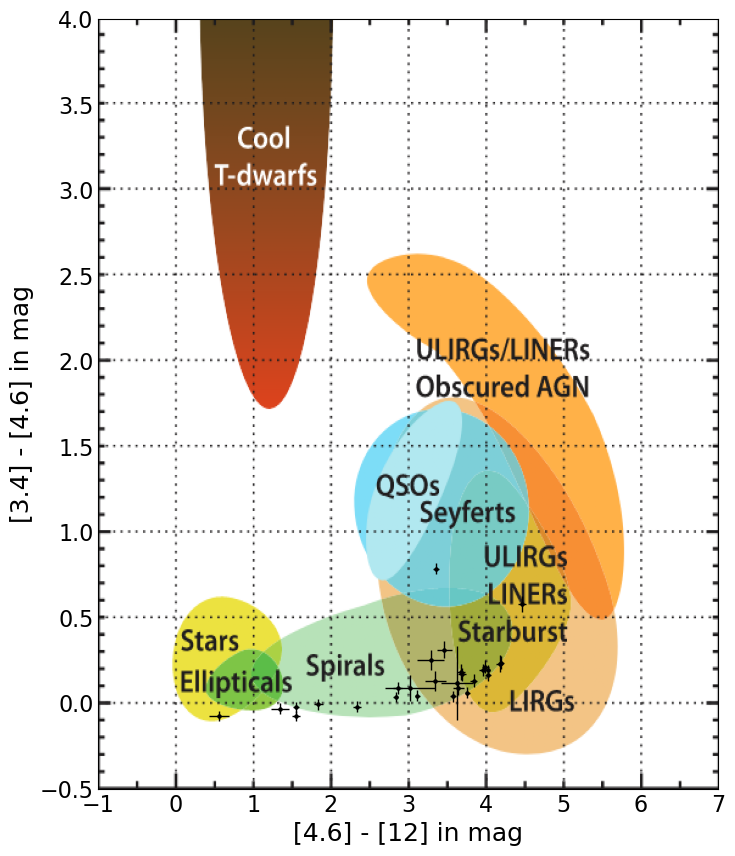

In [53]:
import os.path
W23 = [3.465,3.358,1.841,1.553,3.96,3.991,4.025,3.35,1.342,4.464,4.2,3.687,3.685,3.289,3.632,4.033,3.845,0.556,3.115,2.837,2.863,1.551,2.334,3.018,4.178,3.577,3.761,3.647]
W12 = [0.311,0.786,-0.007,-0.026,0.192,0.213,0.191,0.129,-0.033,0.579,0.236,0.168,0.182,0.251,0.117,0.162,0.131,-0.076,0.043,0.037,0.088,-0.076,-0.021,0.087,0.231,0.039,0.06,0.088]
W1_err = [0.028,0.024,0.023,0.023,0.023,0.026,0.024,0.03,0.023,0.029,0.025,0.025,0.031,0.032,0.064,0.024,0.026,0.022,0.023,0.022,0.024,0.022,0.023,0.034,0.033,0.024,0.024,0.026]
W2_err = [0.041,0.022,0.021,0.02,0.027,0.03,0.024,0.05,0.023,0.037,0.028,0.029,0.033,0.051,0.204,0.026,0.029,0.022,0.021,0.02,0.025,0.021,0.022,0.067,0.034,0.023,0.023,0.034]
W3_err = [0.09,0.026,0.057,0.037,0.032,0.035,0.023,0.123,0.115,0.037,0.027,0.043,0.041,0.17,0,0.029,0.038,0.129,0.021,0.024,0.049,0.052,0.045,0.317,0.031,0.025,0.021,0.06]
W23_err = []
W12_err = []
for i in range(len(W1_err)):
    W23_err.append(np.sqrt(W2_err[i]**2 + W3_err[i]**2))
    W12_err.append(np.sqrt(W1_err[i]**2 + W2_err[i]**2))
galaxy_association_plot()

INFO: Auto-setting vmin to -1.082e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.260e-01 [aplpy.core]
INFO: Auto-setting vmin to -1.128e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.836e-01 [aplpy.core]


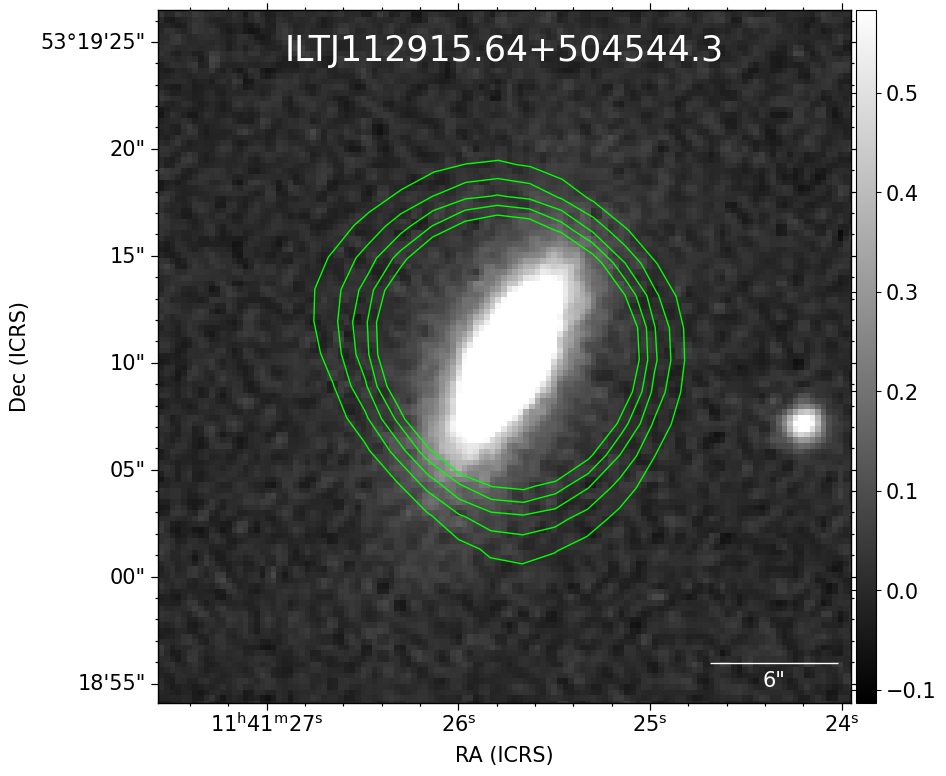

In [77]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
filename = get_pkg_data_filename('SDSS 16.fits')
hdu = fits.open(filename)[0]
hdu.header
gc = aplpy.FITSFigure('SDSS 16.fits')
gc.show_colorscale()
gc.add_colorbar()
gc.recenter(175.3573341,	53.31953195, 0.0045, 0.0045)
gc.add_label(175.3573341,	53.3235, 'ILTJ112915.64+504544.3',color='white',size=25)
gc.add_scalebar(6*u.arcsec)
gc.scalebar.set_color('white')
gc.scalebar.set_label('6"')
gc.scalebar.set_font(size=15, weight=1, \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
gc.show_regions('16.reg')
gc.show_grayscale()
gc.colorbar.set_font(size=15, weight=1, \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
gc.axis_labels.set_font(size=15, weight=1, \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')
gc.tick_labels.set_font(size=15, weight=1, \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')
gc.ticks.set_length(5)
gc.save('cont16.png')



In [54]:
#calculating spectral index
spec = []
spec_err = []
spectral = []
vlasssint = []
firstsint = []
for source in range(len(LOTSSFlux)):
    alpha = np.log(LOTSSFlux[source]/FIRSTFlux[source])/np.log(148/1400)
    spec.append(alpha)
    spectral.append(np.log(LOTSSFlux[source]/0.48)/np.log(148/3000))
for source in range(len(spectral)):
    vlasssint.append((FIRSTFlux[source])/((1400/3000)**spectral[source]))
    firstsint.append(0.48/((3000/1400)**spec[source]))
print(spec)
print(spec_err)
print(spectral)
print(vlasssint)
print(firstsint)


[-0.8231715013965543, -0.5650876421401619, -0.5690566887425055, -0.5411184368273202, -0.6442782239712602, -0.7223456295701222, -0.8209884250734683, -0.6509706028588336, -0.5313370582636462, -0.5532643901701503, -0.5524077300221717]
[]
[-0.5932363785860911, -0.40051838672968615, -0.7035224296268997, -0.3826199519821814, -0.4596520727664721, -0.517947053629672, -0.5916062181945556, -0.46464944774246414, -0.37531593986840617, -0.3916896541485862, -0.3910499635305926]
[0.2863223798601795, 0.33162223631461335, 0.6493245528736094, 0.3361769279478234, 0.31700841780120964, 0.30323236365339096, 0.2866783308715017, 0.3158033243357209, 0.3380535357788864, 0.3338611571400957, 0.3340239654364129]
[0.8988876682916509, 0.7383825338751882, 0.7406195001053162, 0.7250163001076531, 0.7843194060443575, 0.8324012861413, 0.8973933335770868, 0.7883300702611704, 0.7196315587968178, 0.7317588757788038, 0.7312812699906389]


In [55]:
#lower limit for spectral index of VLASS 
for source in range(len(LOTSSFlux)):
    print(np.log(LOTSSFlux[source]/0.02)/np.log(148/3000))

-1.649364600617362
-1.4566466087609566
-1.7596506516581703
-1.438748174013452
-1.5157802947977426
-1.5740752756609424
-1.6477344402258263
-1.5207776697737347
-1.4314441618996767
-1.4478178761798568
-1.447178185561863


In [57]:
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u
for source in range(len(redshift)):
    k = cosmo.kpc_proper_per_arcmin(redshift[source]) * ((1*u.arcmin)/(60*u.arcsec)) * (6*u.arcsec)
    print(k)


3.8761430251910065 kpc
3.025701385508702 kpc
4.198789080086334 kpc
3.5876658156119956 kpc
4.620305456219715 kpc
4.005227158817403 kpc
3.9064097593345792 kpc
4.1026844440667825 kpc
3.399883395284946 kpc
4.639794521681286 kpc
4.110797034276066 kpc


In [58]:
from astropy.cosmology import Planck18 as cosmo
SFRcorr = []
SFRerr = []
Flux = []
Flux_err = []
for source in range(len(redshift)):
    D = cosmo.luminosity_distance(z = redshift[source])
    Dis = D.to(u.cm).value
    Ha = HAlpha[source]
    Hb = HBeta[source]
    if Hb == 0 or Ha/Hb > 2.86:
        E = 0
    else:
        E = 1.97 * np.log((Ha/Hb)/2.86)
    ha = Ha * (10**(-17)) * 10 ** (0.4*3.327*E)
    HA = ha * 4 * np.pi * Dis**2
    Fin = (5.5 * 10**(-42)) * HA
    SFRcorr.append(Fin)
    if Ha != 0:
        SFRerr.append(Fin*np.sqrt((HAlpha_err[source]/Ha)**2+0.15**2))
    else:
        SFRerr.append(0.15*Fin)
for source in range(len(LOTSSFlux)):
    d = cosmo.luminosity_distance(z = redshift[source])
    dis = d.to(u.m).value
    sint = LOTSSFlux[source] * 10**(-29)
    fin = sint * 4 * np.pi * dis**2
    err = error[source] * 10**(-29)
    finerr = err * 4 * np.pi * dis**2
    Flux.append(fin)
    SFR_err.append(0)
    Flux_err.append(finerr)
print(SFRcorr)
print(SFRerr)
print(len(SFRcorr))

[0.1042949186984369, 0.26263514556912193, 0.16681396694692116, 0.14229621890546187, 0.06917879719051162, 0.4637429554400282, 0.09573567406698953, 0.0, 0.019113456826446128, 0.020596401934769273, 0.024265726129368625]
[0.015680035995716646, 0.03944421367870053, 0.025078204968331182, 0.021381940073560673, 0.01043638691787613, 0.06965771233320713, 0.014469236606864461, 0.0, 0.002882104120926998, 0.0031267152098647865, 0.003659727222629973]
11


/var/folders/97/01qdf1t973j6kp9db4ql0q100000gn/T/ipykernel_33119/1444743345.py:14: RuntimeWarning: divide by zero encountered in log
  E = 1.97 * np.log((Ha/Hb)/2.86)


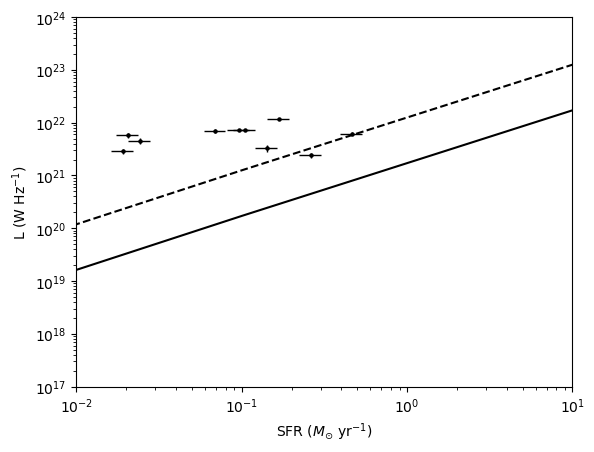

In [59]:
def f(x):
    return (1.25*10**22)*x
x = np.linspace(-10, 10, 100)
def g(x):
    return (1.71*10**21)*x
k = [1,1,0,0,0,0,1,0,1,1,0,0,0,1,1]
for source in range(len(SFRcorr)):
    if k[source] == 0 :
        plt.scatter(SFRcorr[source], Flux[source], s = 5, c = 'black')
        plt.errorbar(SFRcorr[source], Flux[source],
            xerr=SFRerr[source],
            yerr=Flux_err[source],
            capsize=0,
            ls="none",
            color="black",
            elinewidth=1)
    if k[source] == 1:
        plt.errorbar(SFRcorr[source], Flux[source],
            xerr=SFRerr[source],
            yerr=Flux_err[source],
            capsize=0,
            ls="none",
            color="black",
            elinewidth=1)
        plt.scatter(SFRcorr[source], Flux[source], s = 5, c = 'black')
        
plt.plot(x, f(x), linestyle='dashed',color='black')
plt.plot(x, g(x), color='black')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('SFR ($M_{\odot}$ yr$^{-1}$)')
plt.ylim(10e16,10e23)
plt.xlim(10e-3, 10)
plt.ylabel('L (W Hz$^{-1}$)')
plt.show()

In [61]:
file = astropy.io.fits.open('SDSSgalaxies.fits')
SDSSg = file[1].data
g = [130,131,261,271,306,541,846,906,1064,1229,1605,1995,2277,2502,2671,2713,2903,3256,3372,3423,3808]
SDSS = []
for source in range(len(SDSSg)):
    if source in g:
        pass
    else:
        SDSS.append(SDSSg[source])
print(len(SDSS))
print(len(g))

3954
21


Text(0.5, 0, 'Spectroscopic Redshift')

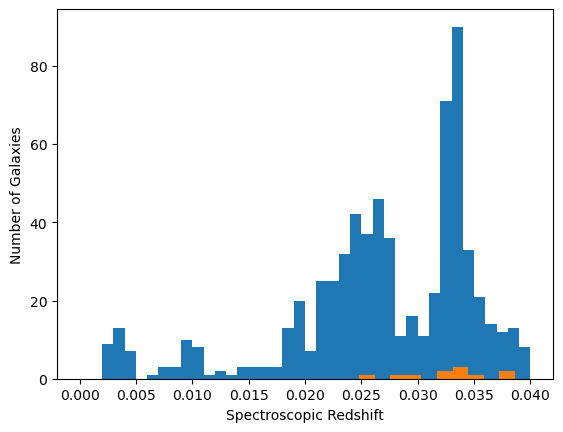

In [63]:
SDSSz = []
for source in range(len(SDSS)):
    if SDSS[source]['zsp'] != 0:
        SDSSz.append(SDSS[source]['zsp'])
plt.hist(SDSSz, range=(0,0.04), bins = 40)
plt.hist(redshift)
plt.ylabel('Number of Galaxies')
plt.xlabel('Spectroscopic Redshift')


In [64]:
offset1 = 1.28
A1 = 2.10
B1 = -0.51

In [65]:
v = Vizier(columns=["*", "+_r"])
DR1 = []
for source in range(len(SDSS)):
    dr1 = v.query_region(SkyCoord(SDSS[source]['RA_ICRS'] * u.degree, SDSS[source]['DE_ICRS'] * u.degree), radius = 40 * u.arcsec, catalog = 'J/A+A/622/A1/lotssdr1')
    if len(dr1) > 0:
        DR1.append(dr1[0][0])
print(len(DR1))

1463


In [66]:
ratio = []
calculated = []
inEnvelope = []
for source in range(len(DR1)):
    ratio.append(DR1[source]['Sint']/DR1[source]['Speak'])
    calculated.append(offset1 + A1 * (DR1[source]['Speak']/DR1[source]['rms']) ** B1)
for source in range(len(ratio)):
    if ratio[source] < calculated[source]:
        inEnvelope.append(True)
    else:
        inEnvelope.append(False)
        
compact1 = []
for source in range(len(inEnvelope)):
    if inEnvelope[source] == True:
        compact1.append(DR1[source])
print(len(compact1))

878


In [67]:
Compact1 = []
for source in range(len(compact1)):
    if compact1[source]['Sint'] > 0.8:
        Compact1.append(compact1[source])
print(len(Compact1))

427


In [68]:
c1 = []
for source in range(len(Compact1)):
    if Compact1[source]['Type'] == 'S':
        c1.append(Compact1[source])
print(len(c1))

406


In [69]:
offset2 = 1.34
A2 = 2.79
B2 = -0.48

In [70]:
v = Vizier(columns=["*", "+_r"])
DR2 = []
for source in range(len(SDSS)):
    dr2 = v.query_region(SkyCoord(SDSS[source]['RA_ICRS'] * u.degree, SDSS[source]['DE_ICRS'] * u.degree), radius = 40 * u.arcsec, catalog = 'J/A+A/659/A1/catalog')
    if len(dr2) > 0:
        DR2.append(dr2[0][0])
print(len(DR2))

1852


In [71]:
ratio2 = []
calculated2 = []
inEnvelope2 = []
for source in range(len(DR2)):
    ratio2.append(DR2[source]['SpeakTot']/DR2[source]['Speak'])
    calculated2.append(offset2 + A2 * (DR2[source]['Speak']/DR2[source]['Islrms']) ** B2)
for source in range(len(ratio2)):
    if ratio2[source] < calculated2[source]:
        inEnvelope2.append(True)
    else:
        inEnvelope2.append(False)
        
compact2 = []
for source in range(len(inEnvelope2)):
    if inEnvelope2[source] == True:
        compact2.append(DR2[source])
print(len(compact2))

1146


In [72]:
Compact2 = []
for source in range(len(compact2)):
    if compact2[source]['SpeakTot'] > 0.8:
        Compact2.append(compact2[source])
print(len(Compact2))

462


In [73]:
c2 = []
for source in range(len(Compact2)):
    if Compact2[source]['SCode'] == 'S':
        c2.append(Compact2[source])
print(len(c2))

431


In [74]:
off1 = []
off2 = []
for source in range(len(c1)):
    off1.append(c1[source]['_r'])
for source in range(len(c2)):
    off2.append(c2[source]['_r'])


In [75]:
print(len(redshift))

11


0.28680408659255596


Text(0, 0.5, 'Number of Sources')

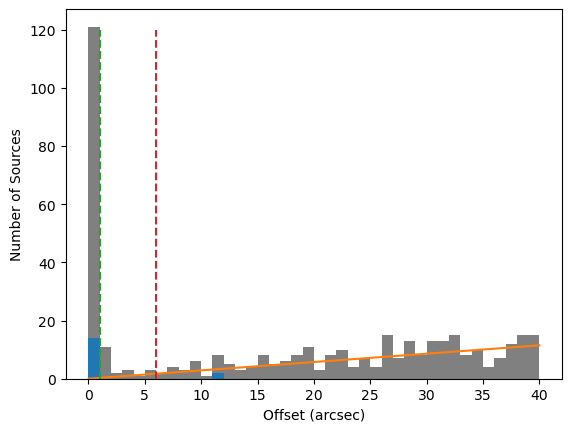

In [76]:
prsoffset = [0.6,0.2,0.5,0.1,0.1,11.9,0.8,0.4,11.7,0.2,0.5,0.6,0.3,0.5,0.8,0.1]
plt.hist(off1,bins=40,color='grey',histtype='barstacked',stacked=True)
plt.hist(prsoffset,histtype='barstacked',stacked=True,bins=40, range=(0,40))
y = np.array([0,   2.,   4.,   3.,   6.,   1.,
          8.,   5.,   3.,   4.,   8.,   5.,   6.,   8.,  11.,   3.,   8.,
         10.,   4.,   7.,   4.,  15.,   7.,  13.,   8.,  13.,  13.,  15.,
          8.,  10.,   4.,   7.,  12.,  15.,  15.])
x = np.array([0,   7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40.])
a,b = np.polyfit(x,y,1)
print(a) 
plt.plot(x, a*x)
plt.plot((1,1),(0,120), '--', scaley = False)
plt.plot((6,6),(0,120), '--', scaley = False)
plt.xlabel('Offset (arcsec)')
plt.ylabel('Number of Sources')

In [77]:
#calculating chance association
chance2 = a * (1)
print(chance2)
chance6 = a * (1+2+3+4+5+6)
print(chance6)

0.28680408659255596
6.022885818443675


In [78]:
import time
file1 = astropy.io.fits.open('asu.fit')
file2 = astropy.io.fits.open('asu-2.fit')
d1 = file1[1].data
d2 = file2[1].data

ratio = []
calculated = []
inEnvelope = []
ccc1 = []
ccc1RA = []
ccc1DEC = []
for source in range(len(d1)):
    ratio.append(d1[source]['Sint']/d1[source]['Speak'])
    calculated.append(offset1 + A1 * (d1[source]['Sint']/d1[source]['rms']) ** B1)
for source in range(len(ratio)):
    if ratio[source] < calculated[source]:
        if d1[source]['Sint'] >= 0.8:
            if d1[source]['Type'] == 'S':
                ccc1.append(d1[source])
                ccc1RA.append(d1[source]['RAJ2000'])
                ccc1DEC.append(d1[source]['DEJ2000'])

ratio = []
calculated = []
inEnvelope = []
ccc2 = []
ccc2RA = []
ccc2DEC = []
for source in range(len(d2)):
    ratio.append(d2[source]['SpeakTot']/d2[source]['Speak'])
    calculated.append(offset2 + A2 * (d2[source]['SpeakTot']/d2[source]['Islrms']) ** B2)
for source in range(len(ratio)):
    if ratio[source] < calculated[source]:
        if d2[source]['SpeakTot'] >= 0.8:
            if d2[source]['Scode'] == 'S':
                ccc2.append(d2[source])
                ccc2RA.append(d2[source]['RAJ2000'])
                ccc2DEC.append(d2[source]['DEJ2000'])

print(len(ccc1))
print(len(ccc2))


/var/folders/97/01qdf1t973j6kp9db4ql0q100000gn/T/ipykernel_33119/1247413056.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  ratio.append(d1[source]['Sint']/d1[source]['Speak'])


86343
145502


In [79]:
max_sep = 2.0 * u.arcsec
c = SkyCoord(ra=ccc1RA*u.degree, dec=ccc1DEC*u.degree)
catalog = SkyCoord(ra=ccc2RA*u.degree, dec=ccc2DEC*u.degree)
idx, d2d, d3d = c.match_to_catalog_sky(catalog)
sep_constraint = d2d < max_sep
c_matches = c[sep_constraint]
catalog_matches = catalog[idx[sep_constraint]]
print(len(c_matches))

73205


In [80]:
#calculating chance association
pcc2 = len(c_matches) * np.pi * (3282/424) * len(SDSS) * (9.41 * 10 ** -11)
print(pcc2)
pcc6 = len(c_matches) * np.pi * (3282/424) * len(SDSS) * (8.47 * 10 ** -10)
print(pcc6)

0.6623531807052486
5.961882508579656


In [81]:
from scipy.stats import ks_2samp
print(ks_2samp(SDSSz, redshift))

KstestResult(statistic=0.6523335081279497, pvalue=4.468410133684486e-05)


In [82]:
def sSFR_plot():
        fig, ax = plt.subplots(figsize=(8, 10))
        img = plt.imread("SSFR.png")
        ax.imshow(img, aspect="auto", extent=[8,12.5,-15,-8])
        ax.scatter(mass, sSFR, color="pink",s=15,marker='D')
        ylabel = "log(sSFR)"
        xlabel = "log(Mass)"
        ax.set_ylabel(ylabel, fontsize=18)
        ax.set_xlabel(xlabel, fontsize=18)
        ax.tick_params(axis="both", which="both", labelsize=16, length=0)
        plt.show()
        #plt.close()

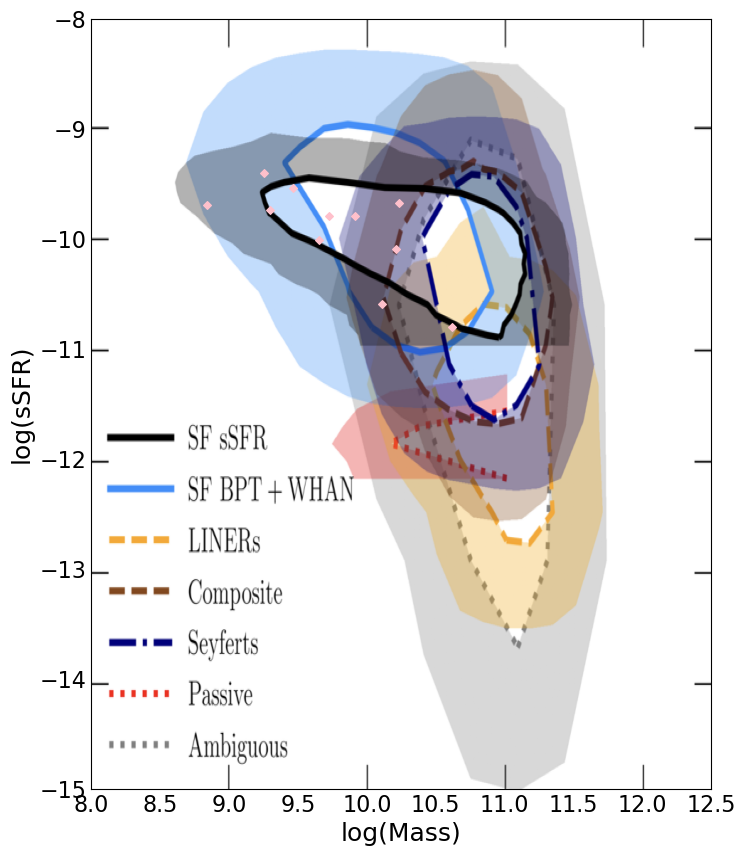

In [83]:

sSFR_plot()
